**NLP ATTRIBUTES CLASSIFICATION**

Prepare Data

In [ ]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.3 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=2636c708f3a352fcbfd2925039734c97bbafb01552e094e4535c4758538d3d5d
  Stored in directory: /tmp/pip-ephem-wheel-cache-9oy01wbw/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
 import matplotlib.pyplot as plt 

In [ ]:
# import necessary libraries 

import numpy as np
import pandas as pd
import spacy
import re


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


In [ ]:
# read the main data dump
Nlp_data_preparation=pd.read_excel('/content/IndexDump.xlsx')
Nlp_data_preparation

# drop the first row of data due to no values
Nlp_data_preparation.drop(Nlp_data_preparation.head(1).index, inplace=True)
Nlp_data_preparation

,id,source,merchantName,link,mediaUrl,thumbnailUrl,category,brandName,productName,description,currency,salePrice,originalPrice,colour,sizes,ownKindCategory,ownKindAttributes
1,RAKUTEN8719029404356,RAKUTEN,Scotch & Soda (UK),https://click.linksynergy.com/link?id=Bv4dmNTv...,https://www.scotch-soda.com/dw/image/v2/AANA_P...,NaN,Polo's,SCOTCH & SODA,Scotch & Soda Striped piqué polo,"With its bold stripe and piqué weave, this pol...",GBP,84.95,84.95,Brown,"S, XL, L, M, XXL",Tops,"{Style Menswear}:Preppy,{MW / WW}:Menswear,{St..."
2,RAKUTEN8718859351465,RAKUTEN,Scotch & Soda (UK),https://click.linksynergy.com/link?id=Bv4dmNTv...,https://www.scotch-soda.com/dw/image/v2/AANA_P...,NaN,Short Sleeve T-Shirts,SCOTCH & SODA,Scotch & Soda Cotton T-Shirt,"Crafted from pure cotton, this classic tee is ...",GBP,34.95,34.95,White,"S, XL, L, M, XXL","Shirts,Tops","{Colour}:White,{Downplay}:Cleavage,{MW / WW}:M..."
3,RAKUTEN8719029380438,RAKUTEN,Scotch & Soda (UK),https://click.linksynergy.com/link?id=Bv4dmNTv...,https://www.scotch-soda.com/dw/image/v2/AANA_P...,NaN,Inbetween Jackets,SCOTCH & SODA,Scotch & Soda Embroidered cotton shirt,Get transported to the sunny beaches of the so...,GBP,154.95,154.95,Blue,"S, XL, L, M","Shirts,Outerwear,Jackets","{Style Womenswear}:Hypebeast,{MW / WW}:Menswea..."
4,RAKUTEN8719029313184,RAKUTEN,Scotch & Soda (UK),https://click.linksynergy.com/link?id=Bv4dmNTv...,https://www.scotch-soda.com/dw/image/v2/AANA_P...,NaN,Short Sleeve T-Shirts,SCOTCH & SODA,Scotch & Soda Loose-fit cotton T-shirt,"Made with organic cotton, our short-sleeved T-...",GBP,45.47,45.47,Black,"S, XL, L, M, XXL","Shirts,Tops","{Colour}:Black,{Downplay}:Stomach,{Style Women..."
5,RAKUTEN8719029331782,RAKUTEN,Scotch & Soda (UK),https://click.linksynergy.com/link?id=Bv4dmNTv...,https://www.scotch-soda.com/dw/image/v2/AANA_P...,NaN,Shorts,SCOTCH & SODA,Scotch & Soda Artwork print Bermuda shorts,These printed Bermuda shorts take us to an und...,GBP,84.95,84.95,Blue,"12, 14, 4, 16, 6, 8, 10",Shorts,"{Downplay}:Back,{Style Womenswear}:Boho,{MW / ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110723,RAKUTEN1413461000001,RAKUTEN,MATCHESFASHION - UK,https://click.linksynergy.com/link?id=Bv4dmNTv...,https://assetsprx.matchesfashion.com/img/produ...,NaN,Apparel & Accessories,PIPPA HOLT,Pippa Holt - No.255 Embroidered Cotton Kaftan ...,Pippa Holt - Pippa Holt's green No.255 kaftan ...,GBP,NaN,815.00,khaki,ONE SIZE,"Clothing,Beachwear","{Downplay}:Stomach,{Style Womenswear}:Boho,{Sh..."
110724,RAKUTEN1413796000001,RAKUTEN,MATCHESFASHION - UK,https://click.linksynergy.com/link?id=Bv4dmNTv...,https://assetsprx.matchesfashion.com/img/produ...,NaN,Apparel & Accessories,BALENCIAGA,Balenciaga - Bb-logo Cat-eye Tortoiseshell-ace...,Balenciaga - Balenciaga's brown sunglasses are...,GBP,NaN,270.00,tortoiseshell,ONE SIZE,"Accessories,Sunglasses","{Style Womenswear}:Hypebeast,{Style Menswear}:..."
110725,RAKUTEN1425480000001,RAKUTEN,MATCHESFASHION - UK,https://click.linksynergy.com/link?id=Bv4dmNTv...,https://assetsprx.matchesfashion.com/img/produ...,NaN,Apparel & Accessories,SHAY,Shay - Emerald & 18kt Gold Hoop Earrings - Wom...,Shay - Tania and Ladan Shayan routinely draw f...,GBP,NaN,960.00,green gold,ONE SIZE,"Earrings,Jewellery","{Colour}:Gold,{Style Womenswear}:Feminine,{Col..."
110726,RAKUTEN1399880000005,RAKUTEN,MATCHESFASHION - UK,https://click.linksynergy.com/link?id=Bv4dmNTv...,https://assetsprx.matchesfashion.com/img/produ...,NaN,Apparel & Accessories,GOLDWIN,Goldwin - Spur Mountain Gore-tex Shell Coat - ...,GOLDWIN - Goldwin crafts this beige Spur Mount...,GBP,NaN,485.00,beige,"M,S,L,XL","Coats,Clothing,Outerwear","{Style Womenswear}:Hypebeast,{Style Menswear}:..."


In [ ]:
# extract 'description' and 'OwnKindAttributes' columns from data
required_data=Nlp_data_preparation[['description','ownKindAttributes']]
required_data

,description,ownKindAttributes
1,"With its bold stripe and piqué weave, this pol...","{Style Menswear}:Preppy,{MW / WW}:Menswear,{St..."
2,"Crafted from pure cotton, this classic tee is ...","{Colour}:White,{Downplay}:Cleavage,{MW / WW}:M..."
3,Get transported to the sunny beaches of the so...,"{Style Womenswear}:Hypebeast,{MW / WW}:Menswea..."
4,"Made with organic cotton, our short-sleeved T-...","{Colour}:Black,{Downplay}:Stomach,{Style Women..."
5,These printed Bermuda shorts take us to an und...,"{Downplay}:Back,{Style Womenswear}:Boho,{MW / ..."
...,...,...
110723,Pippa Holt - Pippa Holt's green No.255 kaftan ...,"{Downplay}:Stomach,{Style Womenswear}:Boho,{Sh..."
110724,Balenciaga - Balenciaga's brown sunglasses are...,"{Style Womenswear}:Hypebeast,{Style Menswear}:..."
110725,Shay - Tania and Ladan Shayan routinely draw f...,"{Colour}:Gold,{Style Womenswear}:Feminine,{Col..."
110726,GOLDWIN - Goldwin crafts this beige Spur Mount...,"{Style Womenswear}:Hypebeast,{Style Menswear}:..."


In [ ]:
# create an array of the description column
X = required_data.iloc[:,0:1].values
X

array([['With its bold stripe and piqué weave, this polo definitely stands out. Designed with a regular fit, button-down collar, and short sleeves, this piece is perfect for summer wear.'],
       ['Crafted from pure cotton, this classic tee is made with a slightly wider crew neck and small logo embroidery.'],
       ['Get transported to the sunny beaches of the south of France with this embroidered cotton shirt. The contrast of the white summer-themed embroidery on the deep blue of the fabric makes sure this button-down shirt makes a statement. Wear over chinos and turn heads.'],
       ...,
       ["Shay - Tania and Ladan Shayan routinely draw from the elegance and simplicity of Art Deco aesthetics to design their fine jewellery offering for Shay, including these 18kt gold hoop earrings. They're crafted to a small, dainty scale - known as huggies - in the label's Los Angeles studio with a hinge fastening, then set with baguette-cut emeralds that total 1.88ct."],
       ["GOLDWIN - Go

In [ ]:
# convert into string
X = X.astype(str)

In [ ]:
# check the data type
type(X)

numpy.ndarray

In [ ]:
# lemmatisation - grouping together the inflected forms of a word so they can be analysed
def preprocess(txt):
    txt = txt.lower() # normalize
    txt = re.sub(r'[^a-zA-Z]', ' ', txt) # remove digits and punctuation
    doc = nlp(txt)
    lemmatized_words = [token.lemma_ for token in doc]
    return " ".join(lemmatized_words)

In [ ]:
# load the spaCy package
nlp=spacy.load('en_core_web_lg')

In [ ]:
# preprocess the text
X = [preprocess(txt) for txt in X.ravel()]

In [ ]:
# check the length of the preprocessed text
len(X)

110727

In [ ]:
# remove stopwords
def remove_stopwords(txt):
    words = txt.split()
    words = [w for w in words if w not in ENGLISH_STOP_WORDS]
    return " ".join(words)

In [ ]:
# show text without stopwords
X = [remove_stopwords(txt) for txt in X]
X

['-PRON- bold stripe piqu weave polo definitely stand design regular fit button collar short sleeve piece perfect summer wear',
 'craft pure cotton classic tee make slightly wide crew neck small logo embroidery',
 'transport sunny beach south france embroidered cotton shirt contrast white summer themed embroidery deep blue fabric make sure button shirt make statement wear chino turn head',
 'make organic cotton -PRON- short sleeved t shirt -PRON- come minimal detailing feature clean silhouette loose fit brand chest graphic stand',
 'print bermuda short -PRON- underwater world underwater creature coral submarine make cotton relaxed fit -PRON- super comfortable great run make belt loop short fit single time',
 '-PRON- ve lot love -PRON- long sleeved t shirt cotton waffle weave add texture rounded hem finish seasonal transitional layer',
 'cut lightweight slightly fabric -PRON- long sleeved t shirt add element fun outfit -PRON- mock neck print gather detailing sleeve elevate look wear bla

In [ ]:
# create an array 
X=np.array(X)

In [ ]:
# use countvectoriser to convert a collection of text documents to a vector of token counts
vectorizer = CountVectorizer()
tfidf_df = vectorizer.fit_transform(X.ravel())

In [ ]:
# show tfidf_df
tfidf_df

<110727x30976 sparse matrix of type '<class 'numpy.int64'>'
	with 2795423 stored elements in Compressed Sparse Row format>

In [ ]:
# check the shape of tfidf_df
tfidf_df.shape

(110727, 30976)

In [ ]:
# extracting the last column of the data
required_data_own_kind_attribute=required_data.iloc[:,1].values
required_data_own_kind_attribute

array(['{Style Menswear}:Preppy,{MW / WW}:Menswear,{Style Menswear}:Classic,{Colour}:Brown',
       '{Colour}:White,{Downplay}:Cleavage,{MW / WW}:Menswear,{Style Menswear}:Classic,{Style Menswear}:Rebel',
       '{Style Womenswear}:Hypebeast,{MW / WW}:Menswear,{Colour}:Blue',
       ...,
       '{Colour}:Gold,{Style Womenswear}:Feminine,{Colour}:Green,{MW / WW}:Womenswear',
       '{Style Womenswear}:Hypebeast,{Style Menswear}:Utilitarian,{Show off}:Stomach,{Downplay}:Arms,{Colour}:Beige,{Style Menswear}:Hypebeast,{MW / WW}:Menswear,{Show off}:Cleavage',
       '{Colour}:Multicolored,{Style Womenswear}:Hypebeast,{Style Womenswear}:Rebel,{Style Menswear}:Hypebeast,{MW / WW}:Womenswear'],
      dtype=object)

In [ ]:
# read the attributes file
attribute_csv=pd.read_csv('/content/attributes.csv')
attribute_csv

,Category \nClothing,Category-\nAccessories,Category-Accessories\nBags,Category -\nFootwear,Attribute-\nColor,Attribute-\nPrint,Styles\nwomenswear,Styles\nMenswear,Body fit,Budgets,Show off
0,All In One,Belts,Shoulder Bags,Heels,Beige,Animal,Rebel,Rebel,fuller bust,0-150,arms
1,Nightwear,Gloves,Top Handle Bags,Boots,Black,Check,Classic,Classic,Maternity,150-500,back
2,Jacket,Hats,Clutches,Loafers,Blue,Floral,Feminine,Preppy,Petite,500+,cleavage
3,Coats,Jewellery,Belt Bags,Trainers,Brown,Gingham,Hypebeast,Hypebeast,Plus,NaN,legs
4,Dresses,Scarves,Tote Bags,Sandals,Gold,Houndtooth,Minimal,Utilitarian,Tall,NaN,shoulders
5,Shirts,Sunglasses,Holdall,Slippers,Green,No print,Normcore,Normcore,NaN,NaN,stomach
6,Skirts,Travel Accessories,Backpacks,Shoes,Grey,Other print,Boho,NaN,NaN,NaN,NaN
7,Tops,Hair Accessories,NaN,NaN,Multicolored,Polka dot,NaN,NaN,NaN,NaN,NaN
8,Trousers,Pocket squares,NaN,NaN,Neutral,Stipes,NaN,NaN,NaN,NaN,NaN
9,Jumpsuits,Cufflinks,NaN,NaN,Orange,Tartan,NaN,NaN,NaN,NaN,NaN


**COLOUR CLASSIFICATION**


In [ ]:
# extract only the colour column from the attributes dataset
attribute_csv_colors=attribute_csv['Attribute-\nColor']

# drop all missing values from the colour column
attribute_csv_colors=attribute_csv_colors.dropna()
attribute_csv_colors

0            Beige
1            Black
2             Blue
3            Brown
4             Gold
5            Green
6             Grey
7     Multicolored
8          Neutral
9           Orange
10            Pink
11          Purple
12             Red
13          Silver
14           White
15          Yellow
Name: Attribute-\nColor, dtype: object

In [ ]:
# converting the values in the colours column into a list
attribute_csv_colors_list=attribute_csv_colors.to_list()
attribute_csv_colors_list

['Beige',
 'Black',
 'Blue',
 'Brown',
 'Gold',
 'Green',
 'Grey',
 'Multicolored',
 'Neutral',
 'Orange',
 'Pink',
 'Purple',
 'Red',
 'Silver',
 'White',
 'Yellow']

In [ ]:
colors=[]

In [ ]:
# to find out whether the colour is in the list or not
def Enquiry(lis1):
    if not lis1:
        return 1
    else:
        return 0

In [ ]:
import re

# matching the colours in the attributes file to the colours in the IndexDump
for i in range(len(required_data_own_kind_attribute)):
  for j in range(len(attribute_csv_colors)):
    value=re.findall(str(attribute_csv_colors[j]),str(required_data_own_kind_attribute[i]))
    if Enquiry(value)==0:
      colors.append(value)

In [ ]:
# to see how many colours are in the indexdump file
len(colors)

120823

In [ ]:
# check all the colours that appear in the indexdump file
colors

[['Brown'],
 ['White'],
 ['Blue'],
 ['Black'],
 ['Blue'],
 ['Neutral'],
 ['Black'],
 ['Blue'],
 ['Pink'],
 ['Green'],
 ['Blue'],
 ['Blue'],
 ['Blue'],
 ['White'],
 ['Black'],
 ['White'],
 ['Blue'],
 ['Black'],
 ['Blue'],
 ['Orange'],
 ['Black'],
 ['Grey'],
 ['Black'],
 ['Blue'],
 ['Brown'],
 ['Yellow'],
 ['Black'],
 ['Neutral'],
 ['Black'],
 ['Brown'],
 ['Black'],
 ['Orange'],
 ['Brown'],
 ['Blue'],
 ['Blue'],
 ['Black'],
 ['White'],
 ['Black'],
 ['Grey'],
 ['Neutral'],
 ['Blue'],
 ['Blue'],
 ['Black'],
 ['Neutral'],
 ['Blue'],
 ['Blue'],
 ['Blue'],
 ['Pink'],
 ['Brown'],
 ['Red'],
 ['Blue'],
 ['Brown'],
 ['Orange'],
 ['White'],
 ['White'],
 ['Blue'],
 ['Blue'],
 ['Black'],
 ['Blue'],
 ['Black'],
 ['Black'],
 ['Blue'],
 ['Brown'],
 ['Gold'],
 ['Blue'],
 ['Black'],
 ['Neutral'],
 ['Green'],
 ['Red'],
 ['Pink'],
 ['Blue'],
 ['Blue'],
 ['Black'],
 ['White'],
 ['Black'],
 ['Black'],
 ['Blue'],
 ['White'],
 ['Blue'],
 ['Black'],
 ['Brown'],
 ['Black'],
 ['White'],
 ['Purple'],
 ['Neutral'],

In [ ]:
# create a dataframe with the colours listed in both datasets
colors_dataframe = pd.DataFrame(colors, columns = ['Color'])
colors_dataframe

,Color
0,Brown
1,White
2,Blue
3,Black
4,Blue
...,...
120818,Brown
120819,Gold
120820,Green
120821,Beige


In [ ]:
# we should have only 110727 colour samples for each row.

# import LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
# will encode all the colours from 0-15
colors_dataframe['Color']=le.fit_transform(colors_dataframe['Color'])
colors_dataframe

,Color
0,3
1,14
2,2
3,1
4,2
...,...
120818,3
120819,4
120820,5
120821,0


In [ ]:
# look at the first 110,727 rows
updated_color_df=colors_dataframe.head(110727)
updated_color_df

,Color
0,3
1,14
2,2
3,1
4,2
...,...
110722,10
110723,14
110724,5
110725,15


In [ ]:
# create an array
updated_color_df_output=updated_color_df.iloc[:,:].values
updated_color_df_output

array([[ 3],
       [14],
       [ 2],
       ...,
       [ 5],
       [15],
       [ 1]])

In [ ]:
# create train and test split
train_X,test_X,train_y,test_y=train_test_split(tfidf_df,updated_color_df_output,test_size=0.2)

### Multinomial NB

In [ ]:
# import MNB
from sklearn.naive_bayes import MultinomialNB
model_colour_MNB=MultinomialNB()

# fit the train and test set on the MNB classifier
model_colour_MNB.fit(train_X,train_y.ravel())
y_pred_colour_MNB=model_colour_MNB.predict(test_X)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

'Accuracy Score: ',accuracy_score(test_y,y_pred_colour_MNB)

('Accuracy Score: ', 0.19520455161202926)

In [ ]:
'F1 Score: ',f1_score(test_y,y_pred_colour_MNB, average='weighted') 

('F1 Score: ', 0.13008157333962025)

In [ ]:
'Precision Score: ',precision_score(test_y,y_pred_colour_MNB, average='weighted') 

('Precision Score: ', 0.11945208365145647)

In [ ]:
'Recall Score: ',recall_score(test_y,y_pred_colour_MNB, average='macro') 

('Recall Score: ', 0.06958761168503087)

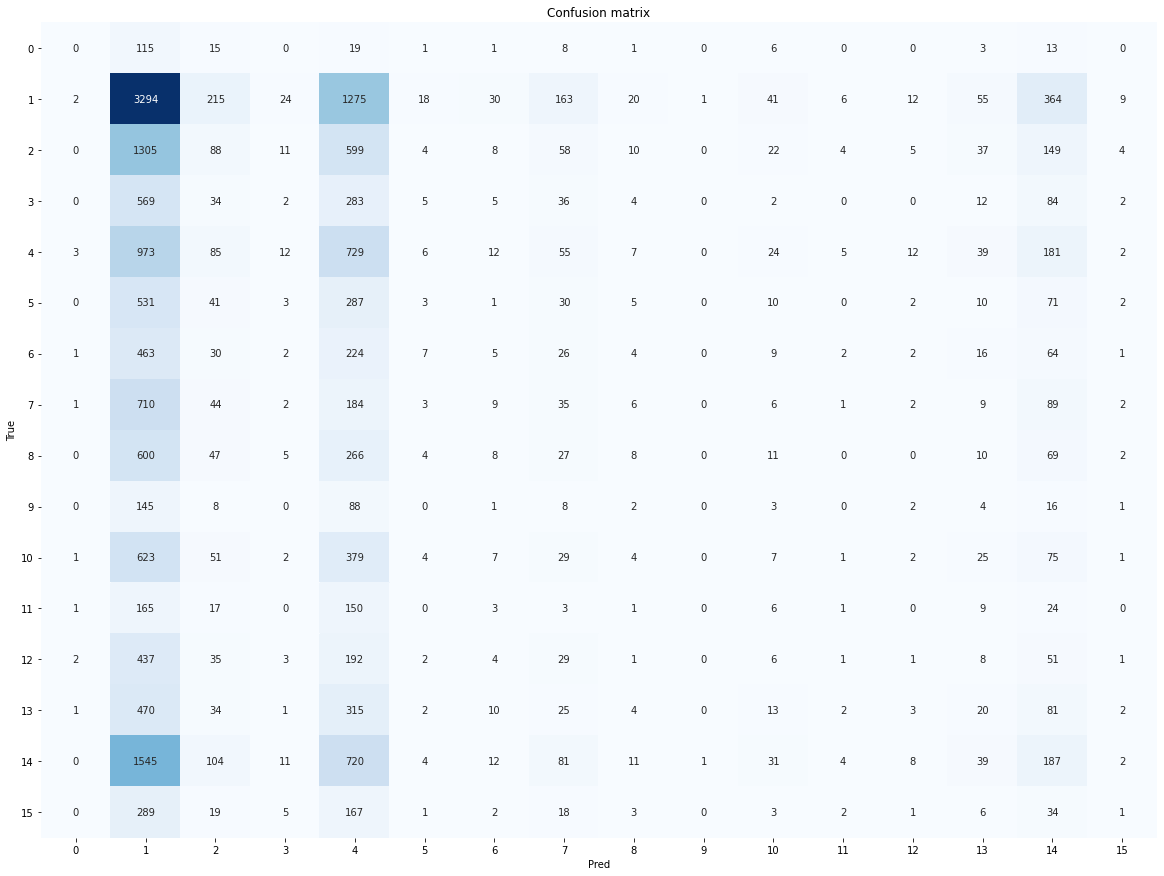

In [ ]:
import sklearn.metrics as metrics
import seaborn as sns

# plot confusion matrix
cm = metrics.confusion_matrix(test_y, y_pred_MB);
fig, ax = plt.subplots(figsize=(20,15));
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False);
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix");
plt.yticks(rotation=0);


In [ ]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
model_colour_RF=RandomForestClassifier()

# fit the train and test set on the Random Forest classifier
model_colour_RF.fit(train_X,train_y.ravel())
y_pred_colour_RF=model_colour_RF.predict(test_X)

In [ ]:
'Accuracy Score: ',accuracy_score(test_y,y_pred_colour_RF)

('Accuracy Score: ', 0.19786868960534634)

In [ ]:
'F1 Score: ',f1_score(test_y,y_pred_colour_RF, average='weighted') 

('F1 Score: ', 0.12896893066479692)

In [ ]:
'Precision Score: ',precision_score(test_y,y_pred_colour_RF, average='weighted') 

('Precision Score: ', 0.11668743537672172)

In [ ]:
'Recall Score: ',recall_score(test_y,y_pred_colour_RF, average='macro') 

('Recall Score: ', 0.06425999633905266)

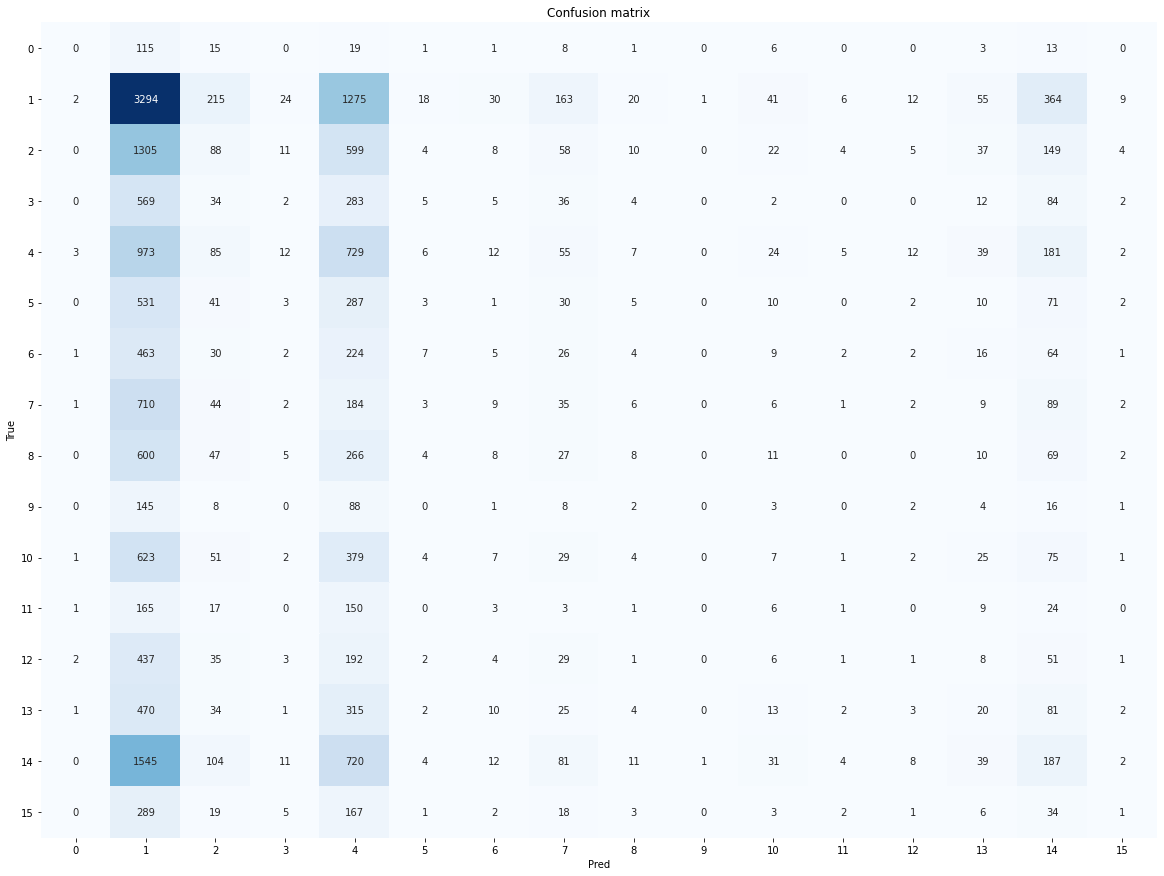

In [ ]:
# plot confusion matrix
cm_RF = metrics.confusion_matrix(test_y, y_pred_RF);
fig, ax = plt.subplots(figsize=(20,15));
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False);
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix");
plt.yticks(rotation=0);

### Decision Tree Classifier

In [ ]:
# import Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
model_colour_DT=DecisionTreeClassifier()

# fit the train and test set on the Decision Tree classifier
model_colour_DT.fit(train_X,train_y.ravel())
y_pred_colour_DT=model_colour_DT.predict(test_X)


In [ ]:
'Accuracy Score: ',accuracy_score(test_y,y_pred_colour_DT)

('Accuracy Score: ', 0.1323489569222433)

In [ ]:
'F1 Score: ',f1_score(test_y,y_pred_colour_DT, average='weighted') 

('F1 Score: ', 0.12556196938615158)

In [ ]:
'Precision Score: ',precision_score(test_y,y_pred_colour_DT, average='weighted') 

('Precision Score: ', 0.12025706267499645)

In [ ]:
'Recall Score: ',recall_score(test_y,y_pred_colour_DT, average='macro') 

('Recall Score: ', 0.06467379177474708)

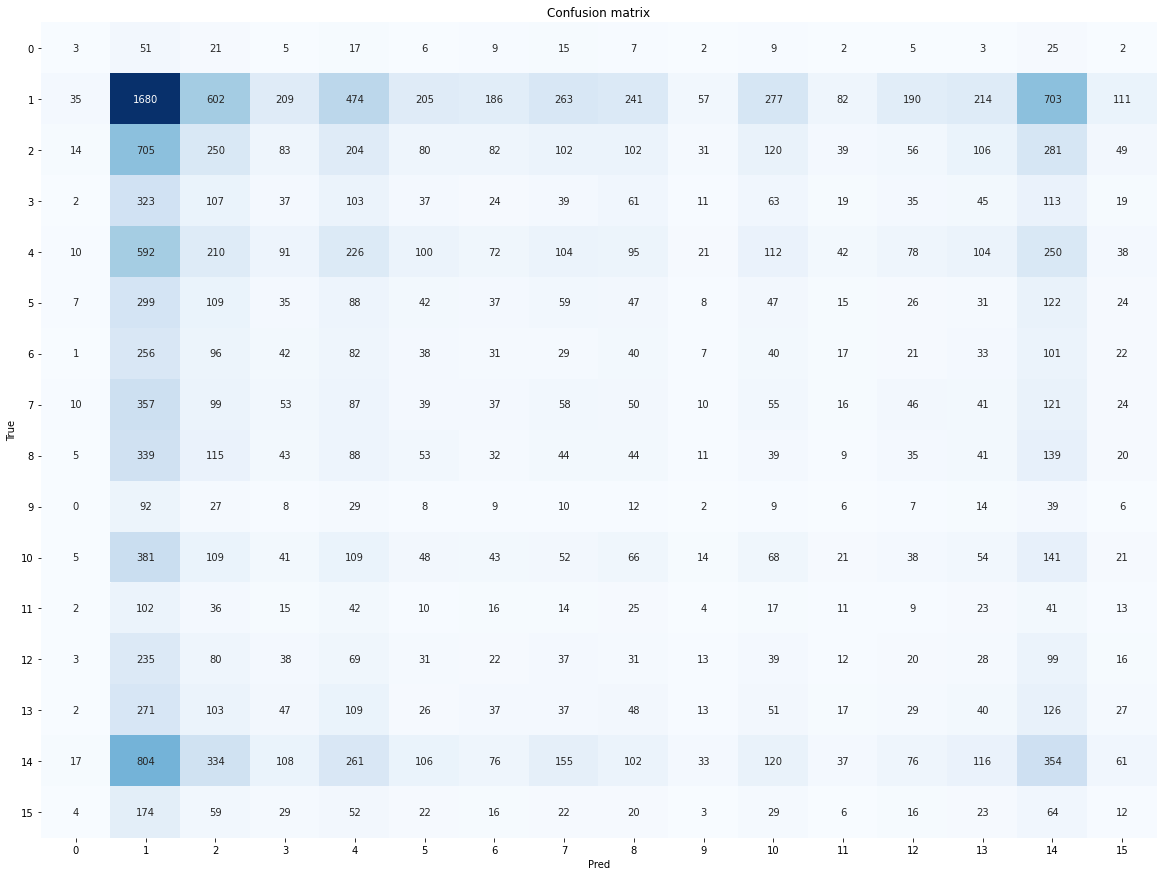

In [ ]:
# plot confusion matrix
cm_DT = metrics.confusion_matrix(test_y, y_pred_DT);
fig, ax = plt.subplots(figsize=(20,15));
sns.heatmap(cm_DT, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False);
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix");
plt.yticks(rotation=0);

In [ ]:
from sklearn.linear_model import LogisticRegression
model_colour_LR=LogisticRegression()

# fit the train and test set on the Random Forest classifier
model_colour_LR.fit(train_X,train_y.ravel())
y_pred_colour_LR=model_colour_LR.predict(test_X)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
'Accuracy Score: ',accuracy_score(test_y,y_pred_colour_LR)

('Accuracy Score: ', 0.18341912760769438)

In [ ]:
'F1 Score: ',f1_score(test_y,y_pred_colour_LR, average='weighted') 

('F1 Score: ', 0.12768283020826346)

In [ ]:
'Precision Score: ',precision_score(test_y,y_pred_colour_LR, average='weighted') 

('Precision Score: ', 0.11473064959064579)

In [ ]:
'Recall Score: ',recall_score(test_y,y_pred_colour_LR, average='macro') 

('Recall Score: ', 0.0625219662684009)

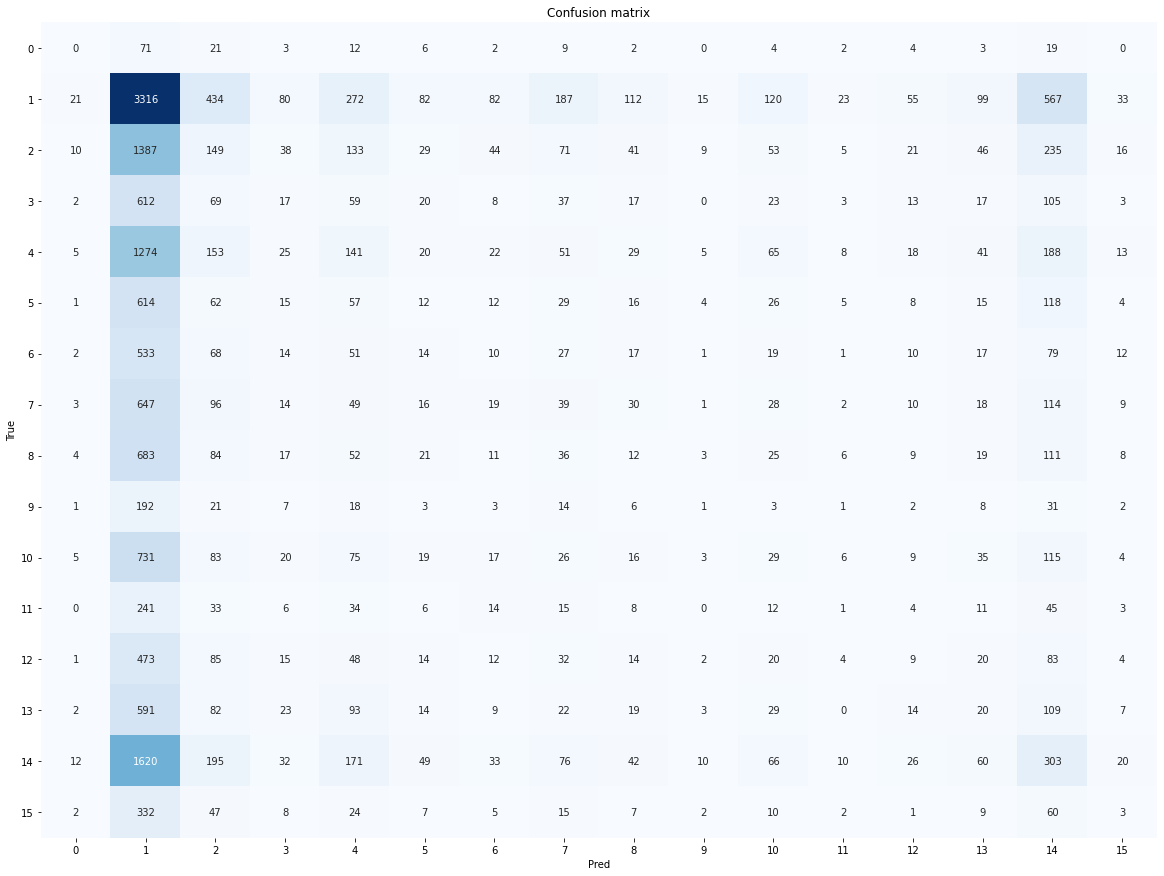

In [ ]:
# plot confusion matrix
import sklearn.metrics as metrics
import matplotlib.pyplot as plt 
import seaborn as sns

cm_colour_LR = metrics.confusion_matrix(test_y, y_pred_colour_LR);
fig, ax = plt.subplots(figsize=(20,15));
sns.heatmap(cm_colour_LR, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False);
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix");
plt.yticks(rotation=0);

### **PRINT CLASSIFICATION**

In [ ]:
Nlp_data_preparation

required_data=Nlp_data_preparation[['description','ownKindAttributes']]
required_data

,description,ownKindAttributes
1,"With its bold stripe and piqué weave, this pol...","{Style Menswear}:Preppy,{MW / WW}:Menswear,{St..."
2,"Crafted from pure cotton, this classic tee is ...","{Colour}:White,{Downplay}:Cleavage,{MW / WW}:M..."
3,Get transported to the sunny beaches of the so...,"{Style Womenswear}:Hypebeast,{MW / WW}:Menswea..."
4,"Made with organic cotton, our short-sleeved T-...","{Colour}:Black,{Downplay}:Stomach,{Style Women..."
5,These printed Bermuda shorts take us to an und...,"{Downplay}:Back,{Style Womenswear}:Boho,{MW / ..."
...,...,...
110723,Pippa Holt - Pippa Holt's green No.255 kaftan ...,"{Downplay}:Stomach,{Style Womenswear}:Boho,{Sh..."
110724,Balenciaga - Balenciaga's brown sunglasses are...,"{Style Womenswear}:Hypebeast,{Style Menswear}:..."
110725,Shay - Tania and Ladan Shayan routinely draw f...,"{Colour}:Gold,{Style Womenswear}:Feminine,{Col..."
110726,GOLDWIN - Goldwin crafts this beige Spur Mount...,"{Style Womenswear}:Hypebeast,{Style Menswear}:..."


In [ ]:
required_data=required_data.head(279)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer( min_df=2, max_features=100)
tfidf.fit(required_data['description'].values.astype('U'))
tfidf_df=tfidf.transform(required_data['description'].values.astype('U')).toarray()

In [ ]:
attribute_csv_print=attribute_csv['Attribute-\nPrint']

attribute_csv_print=attribute_csv_print.dropna()
attribute_csv_print

attribute_csv_print_list=attribute_csv_print.to_list()
attribute_csv_print_list
type(attribute_csv_print_list)

print=[]

def Enquiry(lis1):
    if not lis1:
        return 1
    else:
        return 0

for i in range(len(required_data_own_kind_attribute)):
  for j in range(len(attribute_csv_print)):
    value=re.findall(str(attribute_csv_print[j]),str(required_data_own_kind_attribute[i]))
    if Enquiry(value)==0:
      print.append(value)

len(print)

print

print_dataframe = pd.DataFrame(print, columns = ['Prints'])
print_dataframe

,Prints
0,Animal
1,Animal
2,Animal
3,Animal
4,Animal
...,...
274,Animal
275,Animal
276,Animal
277,Animal


In [ ]:
print_dataframe['Prints']=le.fit_transform(print_dataframe['Prints'])
print_dataframe

,Prints
0,0
1,0
2,0
3,0
4,0
...,...
274,0
275,0
276,0
277,0


In [ ]:
print_dataframe_y=print_dataframe.iloc[:,:].values
print_dataframe_y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [ ]:
tfidf_df.shape

(279, 100)

In [ ]:
from sklearn.metrics import classification_report

train_X,test_X,train_y,test_y=train_test_split(tfidf_df,print_dataframe_y,test_size=0.2)

In [ ]:
# import MNB classifier
from sklearn.naive_bayes import MultinomialNB
model_print_MNB=MultinomialNB()

# fit the train and test set on the MNB classifier
model_print_MNB.fit(train_X,train_y.ravel())
y_pred_print_MNB=model_print_MNB.predict(test_X)

In [ ]:
'Accuracy Score: ',accuracy_score(test_y,y_pred_print_MNB)

('Accuracy Score: ', 0.9821428571428571)

In [ ]:
'F1 Score: ',f1_score(test_y,y_pred_print_MNB, average='weighted') 

('F1 Score: ', 0.9732947232947231)

In [ ]:
'Precision Score: ',precision_score(test_y,y_pred_print_MNB, average='weighted') 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


('Precision Score: ', 0.9646045918367346)

In [ ]:
'Recall Score: ',recall_score(test_y,y_pred_print_MNB, average='macro') 

('Recall Score: ', 0.5)

In [ ]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
model_print_RF=RandomForestClassifier()

# fit the train and test set on the Random Forest classifier
model_print_RF.fit(train_X,train_y.ravel())
y_pred_print_RF=model_print_RF.predict(test_X)

In [ ]:
'Accuracy Score: ',accuracy_score(test_y,y_pred_print_RF)

('Accuracy Score: ', 0.9821428571428571)

In [ ]:
'F1 Score: ',f1_score(test_y,y_pred_print_RF, average='weighted') 

('F1 Score: ', 0.9732947232947231)

In [ ]:
'Precision Score: ',precision_score(test_y,y_pred_print_RF, average='weighted') 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


('Precision Score: ', 0.9646045918367346)

In [ ]:
'Recall Score: ',recall_score(test_y,y_pred_print_RF, average='macro') 

('Recall Score: ', 0.5)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_print_LR=LogisticRegression()

# fit the train and test set on the Random Forest classifier
model_print_LR.fit(train_X,train_y.ravel())
y_pred_print_LR=model_print_LR.predict(test_X)


In [ ]:
'Accuracy Score: ',accuracy_score(test_y,y_pred_print_LR)

('Accuracy Score: ', 0.9821428571428571)

In [ ]:
# import Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
model_print_DT=DecisionTreeClassifier()

# fit the train and test set on the Decision Tree classifier
model_print_DT.fit(train_X,train_y.ravel())
y_pred_print_DT=model_print_DT.predict(test_X)

In [ ]:
'Accuracy Score: ',accuracy_score(test_y,y_pred_print_DT)

('Accuracy Score: ', 0.8928571428571429)

In [ ]:
'F1 Score: ',f1_score(test_y,y_pred_print_DT, average='weighted') 

('F1 Score: ', 0.9265498652291105)

In [ ]:
'Precision Score: ',precision_score(test_y,y_pred_print_DT, average='weighted') 

('Precision Score: ', 0.9628851540616247)

In [ ]:
'Recall Score: ',recall_score(test_y,y_pred_print_DT, average='macro') 

('Recall Score: ', 0.45454545454545453)

Womenswear

In [ ]:
Nlp_data_preparation
required_data=Nlp_data_preparation[['description','ownKindAttributes']]
required_data


,description,ownKindAttributes
1,"With its bold stripe and piqué weave, this pol...","{Style Menswear}:Preppy,{MW / WW}:Menswear,{St..."
2,"Crafted from pure cotton, this classic tee is ...","{Colour}:White,{Downplay}:Cleavage,{MW / WW}:M..."
3,Get transported to the sunny beaches of the so...,"{Style Womenswear}:Hypebeast,{MW / WW}:Menswea..."
4,"Made with organic cotton, our short-sleeved T-...","{Colour}:Black,{Downplay}:Stomach,{Style Women..."
5,These printed Bermuda shorts take us to an und...,"{Downplay}:Back,{Style Womenswear}:Boho,{MW / ..."
...,...,...
110723,Pippa Holt - Pippa Holt's green No.255 kaftan ...,"{Downplay}:Stomach,{Style Womenswear}:Boho,{Sh..."
110724,Balenciaga - Balenciaga's brown sunglasses are...,"{Style Womenswear}:Hypebeast,{Style Menswear}:..."
110725,Shay - Tania and Ladan Shayan routinely draw f...,"{Colour}:Gold,{Style Womenswear}:Feminine,{Col..."
110726,GOLDWIN - Goldwin crafts this beige Spur Mount...,"{Style Womenswear}:Hypebeast,{Style Menswear}:..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer( min_df=2, max_features=100)
tfidf.fit(required_data['description'].values.astype('U'))
tfidf_df=tfidf.transform(required_data['description'].values.astype('U')).toarray()

In [ ]:
attribute_csv_ww=attribute_csv['Styles\nwomenswear']
attribute_csv_wwt=attribute_csv_ww.dropna()
attribute_csv_ww

attribute_csv_ww_list=attribute_csv_ww.to_list()
attribute_csv_ww_list

type(attribute_csv_ww_list)

ww=[]

def Enquiry(lis1):
    if not lis1:
        return 1
    else:
        return 0

for i in range(len(required_data_own_kind_attribute)):
  for j in range(len(attribute_csv_ww)):
    value=re.findall(str(attribute_csv_ww[j]),str(required_data_own_kind_attribute[i]))
    if Enquiry(value)==0:
      ww.append(value)

len(ww)

ww




[['Classic'],
 ['Rebel'],
 ['Classic'],
 ['Hypebeast'],
 ['Classic'],
 ['Hypebeast', 'Hypebeast'],
 ['Boho'],
 ['Boho'],
 ['Boho'],
 ['Feminine'],
 ['Normcore'],
 ['Rebel'],
 ['Rebel'],
 ['Hypebeast'],
 ['Normcore'],
 ['Rebel', 'Rebel'],
 ['Minimal'],
 ['Rebel'],
 ['Feminine'],
 ['Rebel'],
 ['Classic'],
 ['Minimal'],
 ['Rebel'],
 ['Hypebeast'],
 ['Normcore'],
 ['Minimal'],
 ['Classic', 'Classic'],
 ['Feminine'],
 ['Minimal'],
 ['Rebel'],
 ['Hypebeast', 'Hypebeast'],
 ['Normcore'],
 ['Boho'],
 ['Rebel'],
 ['Hypebeast', 'Hypebeast'],
 ['Feminine'],
 ['Classic'],
 ['Hypebeast', 'Hypebeast'],
 ['Minimal'],
 ['Normcore', 'Normcore'],
 ['Rebel'],
 ['Classic'],
 ['Hypebeast'],
 ['Normcore'],
 ['Rebel'],
 ['Hypebeast', 'Hypebeast'],
 ['Feminine'],
 ['Boho'],
 ['Rebel'],
 ['Hypebeast', 'Hypebeast'],
 ['Minimal'],
 ['Normcore', 'Normcore'],
 ['Hypebeast', 'Hypebeast'],
 ['Rebel'],
 ['Classic'],
 ['Minimal'],
 ['Rebel'],
 ['Rebel'],
 ['Hypebeast', 'Hypebeast'],
 ['Classic'],
 ['Minimal'],
 ['Rebe

In [ ]:
ww_dataframe = pd.DataFrame(ww)
ww_dataframe.columns=['WW','Dummy_WW']
ww_dataframe

,WW,Dummy_WW
0,Classic,None
1,Rebel,None
2,Classic,None
3,Hypebeast,None
4,Classic,None
...,...,...
131993,Hypebeast,Hypebeast
131994,Feminine,None
131995,Hypebeast,Hypebeast
131996,Rebel,None


In [ ]:
ww_dataframe_updated=ww_dataframe.drop('Dummy_WW',axis=1)
ww_dataframe_updated

,WW
0,Classic
1,Rebel
2,Classic
3,Hypebeast
4,Classic
...,...
131993,Hypebeast
131994,Feminine
131995,Hypebeast
131996,Rebel


In [ ]:
ww_dataframe_updated=ww_dataframe_updated.head(110727)

In [ ]:
ww_dataframe_updated['WW']=le.fit_transform(ww_dataframe_updated['WW'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ww_dataframe_updated

,WW
0,1
1,6
2,1
3,3
4,1
...,...
110722,5
110723,0
110724,3
110725,6


In [ ]:
ww_dataframe_updated=ww_dataframe_updated.iloc[:,:].values
ww_dataframe_updated

array([[1],
       [6],
       [1],
       ...,
       [3],
       [6],
       [1]])

In [ ]:
tfidf_df

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tfidf_df.shape

(110727, 100)

In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(tfidf_df,ww_dataframe_updated,test_size=0.2)

In [ ]:

from sklearn.naive_bayes import MultinomialNB
model_womenswear_MNB=MultinomialNB()

model_womenswear_MNB.fit(train_X,train_y.ravel())
y_pred_womenswear_MNB=model_womenswear_MNB.predict(test_X)

In [ ]:
'Accuracy Score: ',accuracy_score(test_y,y_pred_womenswear_MNB)

('Accuracy Score: ', 0.34024203016346066)

In [ ]:
'F1 Score: ',f1_score(test_y,y_pred_womenswear_MNB, average='weighted') 

('F1 Score: ', 0.17275184106207178)

In [ ]:
'Precision Score: ',precision_score(test_y,y_pred_womenswear_MNB, average='weighted') 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


('Precision Score: ', 0.11576463908975326)

In [ ]:
'Recall Score: ',recall_score(test_y,y_pred_womenswear_MNB, average='macro') 

('Recall Score: ', 0.125)

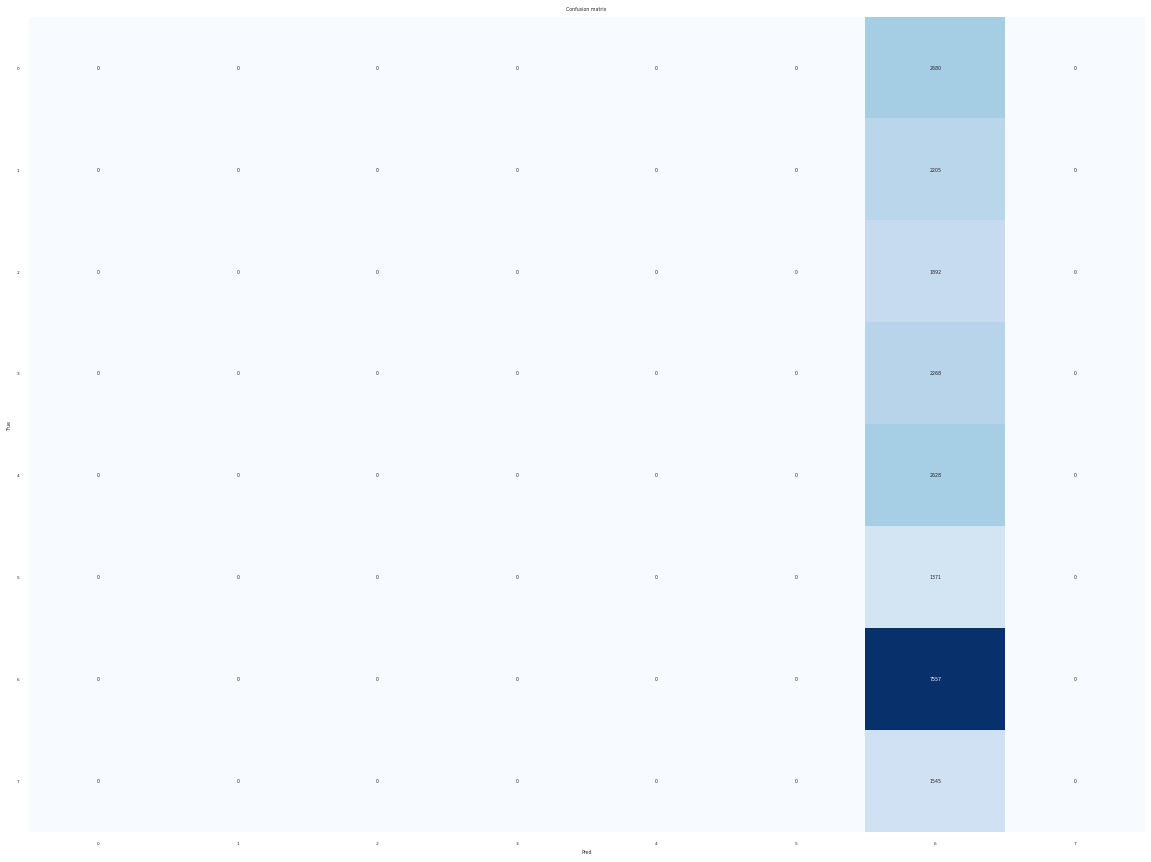

In [ ]:
# plot confusion matrix
cm_womenswear_MNB = metrics.confusion_matrix(test_y, y_pred_womenswear_MNB);
fig, ax = plt.subplots(figsize=(20,15));
sns.heatmap(cm_womenswear_MNB, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False);
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix");
plt.yticks(rotation=0);

In [ ]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
model_womenswear_RF=RandomForestClassifier()

# fit the train and test set on the Random Forest classifier
model_womenswear_RF.fit(train_X,train_y.ravel())
y_pred_womenswear_RF=model_womenswear_RF.predict(test_X)


In [ ]:
'Accuracy Score: ',accuracy_score(test_y,y_pred_womenswear_RF)

('Accuracy Score: ', 0.29878984918269663)

In [ ]:
'F1 Score: ',f1_score(test_y,y_pred_womenswear_RF, average='weighted') 

('F1 Score: ', 0.1991790183731173)

In [ ]:
'Precision Score: ',precision_score(test_y,y_pred_womenswear_RF, average='weighted') 

('Precision Score: ', 0.19274930273306382)

In [ ]:
'Recall Score: ',recall_score(test_y,y_pred_womenswear_RF, average='macro') 

('Recall Score: ', 0.1315319311162556)

In [ ]:
# import Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
model_womenswear_DT=DecisionTreeClassifier()

model_womenswear_DT.fit(train_X,train_y.ravel())
y_pred_womenswear_DT=model_womenswear_DT.predict(test_X)

In [ ]:
'Accuracy Score: ',accuracy_score(test_y,y_pred_womenswear_DT)

('Accuracy Score: ', 0.1895150365754538)

In [ ]:
'F1 Score: ',f1_score(test_y,y_pred_womenswear_DT, average='weighted') 

('F1 Score: ', 0.18678210717608)

In [ ]:
'Precision Score: ',precision_score(test_y,y_pred_womenswear_DT, average='weighted') 

('Precision Score: ', 0.18452015017633347)

In [ ]:
'Recall Score: ',recall_score(test_y,y_pred_womenswear_DT, average='macro') 

('Recall Score: ', 0.12804854691286557)

In [ ]:
# import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
model_womenswear_LR=LogisticRegression()

# fit the train and test set on the Random Forest classifier
model_womenswear_LR.fit(train_X,train_y.ravel())
y_pred_womenswear_LR=model_womenswear_LR.predict(test_X)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
'Accuracy Score: ',accuracy_score(test_y,y_pred_womenswear_LR)

('Accuracy Score: ', 0.34046780456967396)

In [ ]:
'F1 Score: ',f1_score(test_y,y_pred_womenswear_LR, average='weighted') 

('F1 Score: ', 0.1741755063111957)

In [ ]:
'Precision Score: ',precision_score(test_y,y_pred_womenswear_LR, average='weighted') 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


('Precision Score: ', 0.13957566179647293)

In [ ]:
'Recall Score: ',recall_score(test_y,y_pred_womenswear_LR, average='macro') 

('Recall Score: ', 0.12611285503573993)

### **Menswear**

In [ ]:
required_data=required_data.head(89410)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer( min_df=2, max_features=100)
tfidf.fit(required_data['description'].values.astype('U'))
tfidf_df=tfidf.transform(required_data['description'].values.astype('U')).toarray()

In [ ]:
attribute_csv_mw=attribute_csv['Styles\nMenswear']
attribute_csv_mw=attribute_csv_mw.dropna()
attribute_csv_mw

attribute_csv_mw_list=attribute_csv_mw.to_list()
attribute_csv_mw_list

type(attribute_csv_mw_list)

mw=[]

def Enquiry(lis1):
    if not lis1:
        return 1
    else:
        return 0

for i in range(len(required_data_own_kind_attribute)):
  for j in range(len(attribute_csv_mw)):
    value=re.findall(str(attribute_csv_mw[j]),str(required_data_own_kind_attribute[i]))
    if Enquiry(value)==0:
      mw.append(value)

len(mw)

mw

[['Classic'],
 ['Preppy'],
 ['Rebel'],
 ['Classic'],
 ['Hypebeast'],
 ['Classic'],
 ['Hypebeast', 'Hypebeast'],
 ['Normcore'],
 ['Rebel'],
 ['Rebel'],
 ['Hypebeast'],
 ['Normcore'],
 ['Rebel', 'Rebel'],
 ['Rebel'],
 ['Rebel'],
 ['Classic'],
 ['Preppy'],
 ['Rebel'],
 ['Hypebeast'],
 ['Normcore'],
 ['Classic', 'Classic'],
 ['Utilitarian'],
 ['Rebel'],
 ['Hypebeast', 'Hypebeast'],
 ['Normcore'],
 ['Rebel'],
 ['Hypebeast', 'Hypebeast'],
 ['Utilitarian'],
 ['Classic'],
 ['Hypebeast', 'Hypebeast'],
 ['Normcore', 'Normcore'],
 ['Rebel'],
 ['Classic'],
 ['Hypebeast'],
 ['Normcore'],
 ['Rebel'],
 ['Hypebeast', 'Hypebeast'],
 ['Rebel'],
 ['Hypebeast', 'Hypebeast'],
 ['Normcore', 'Normcore'],
 ['Hypebeast', 'Hypebeast'],
 ['Rebel'],
 ['Classic'],
 ['Preppy'],
 ['Rebel'],
 ['Rebel'],
 ['Hypebeast', 'Hypebeast'],
 ['Classic'],
 ['Preppy'],
 ['Rebel'],
 ['Hypebeast', 'Hypebeast'],
 ['Classic'],
 ['Rebel'],
 ['Hypebeast'],
 ['Normcore'],
 ['Rebel'],
 ['Classic'],
 ['Preppy'],
 ['Rebel'],
 ['Preppy'],

In [ ]:
mw_dataframe = pd.DataFrame(mw)
mw_dataframe.columns=['MW','Dummy_MW']
mw_dataframe

,MW,Dummy_MW
0,Classic,None
1,Preppy,None
2,Rebel,None
3,Classic,None
4,Hypebeast,None
...,...,...
89405,Hypebeast,Hypebeast
89406,Hypebeast,Hypebeast
89407,Utilitarian,None
89408,Rebel,None


In [ ]:
mw_dataframe=mw_dataframe.drop('Dummy_MW',axis=1)
mw_dataframe

,MW
0,Classic
1,Preppy
2,Rebel
3,Classic
4,Hypebeast
...,...
89405,Hypebeast
89406,Hypebeast
89407,Utilitarian
89408,Rebel


In [ ]:
mw_dataframe['MW']=le.fit_transform(mw_dataframe['MW'])
mw_dataframe

,MW
0,0
1,3
2,4
3,0
4,1
...,...
89405,1
89406,1
89407,5
89408,4


In [ ]:
mw_dataframe=mw_dataframe.iloc[:,:].values
mw_dataframe

array([[0],
       [3],
       [4],
       ...,
       [5],
       [4],
       [1]])

In [ ]:
tfidf_df.shape

(89410, 100)

In [ ]:
tfidf_df=pd.DataFrame(tfidf_df)
tfidf_df=tfidf_df.head(89410)

In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(tfidf_df,mw_dataframe,test_size=0.2)

In [ ]:
## Multinomial NB Classifier

from sklearn.naive_bayes import MultinomialNB
model_menswear_MNB=MultinomialNB()

model_menswear_MNB.fit(train_X,train_y.ravel())
y_pred_menswear_MNB=model_menswear_MNB.predict(test_X)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_menswear_MNB=confusion_matrix(test_y,y_pred_menswear_MNB)
cm_menswear_MNB


array([[   0,    0,    0,    0, 2640,    0],
       [   0,    0,    0,    0, 2709,    0],
       [   0,    0,    0,    0, 1640,    0],
       [   0,    0,    0,    0,  425,    0],
       [   0,    0,    0,    0, 9014,    0],
       [   0,    0,    0,    0, 1454,    0]])

In [ ]:
from sklearn.metrics import accuracy_score

'Accuracy Score: ',accuracy_score(test_y,y_pred_menswear_MNB)

('Accuracy Score: ', 0.5040823174141595)

In [ ]:
'F1 Score: ',f1_score(test_y,y_pred_menswear_MNB, average='weighted') 

('F1 Score: ', 0.3378790905094612)

In [ ]:
'Precision Score: ',precision_score(test_y,y_pred_menswear_MNB, average='weighted') 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


('Precision Score: ', 0.2540989827296295)

In [ ]:
'Recall Score: ',recall_score(test_y,y_pred_menswear_MNB, average='macro') 

('Recall Score: ', 0.16666666666666666)

In [ ]:
## Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model_womenswear_RF=RandomForestClassifier()

model_womenswear_RF.fit(train_X,train_y.ravel())
y_pred_womenswear_RF=model_womenswear_RF.predict(test_X)

In [ ]:
'Accuracy Score: ',accuracy_score(test_y,y_pred_womenswear_RF)

('Accuracy Score: ', 0.29797706132032875)

In [ ]:
'F1 Score: ',f1_score(test_y,y_pred_womenswear_RF, average='weighted') 

('F1 Score: ', 0.19797813885369747)

In [ ]:
'Precision Score: ',precision_score(test_y,y_pred_womenswear_RF, average='weighted') 

('Precision Score: ', 0.190150108283077)

In [ ]:
'Recall Score: ',recall_score(test_y,y_pred_womenswear_RF, average='macro') 

('Recall Score: ', 0.13056435089602075)

In [ ]:
cm_menswear_RF=confusion_matrix(test_y,y_pred_menswear_RF)
cm_menswear_RF


array([[  78,   99,   38,   19, 2359,   47],
       [  81,   82,   38,    7, 2467,   34],
       [  45,   49,   29,    4, 1497,   16],
       [  13,   13,    7,    1,  386,    5],
       [ 298,  289,  130,   26, 8148,  123],
       [  46,   37,   24,    4, 1317,   26]])

In [ ]:
from sklearn.metrics import accuracy_score

'Accuracy Score: ',accuracy_score(test_y,y_pred_menswear_RF)


('Accuracy Score: ', 0.46773291578123255)

In [ ]:
'F1 Score: ',f1_score(test_y,y_pred_menswear_RF, average='weighted') 

('F1 Score: ', 0.34627123541602295)

In [ ]:
'Precision Score: ',precision_score(test_y,y_pred_menswear_RF, average='weighted') 

('Precision Score: ', 0.3151120369431314)

In [ ]:
'Recall Score: ',recall_score(test_y,y_pred_menswear_RF, average='macro') 

('Recall Score: ', 0.1669432874397456)

In [ ]:
# import Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
model_menswear_DT=DecisionTreeClassifier()

model_menswear_DT.fit(train_X,train_y.ravel())
y_pred_menswear_DT=model_menswear_DT.predict(test_X)

In [ ]:
cm_menswear_DT=confusion_matrix(test_y,y_pred_menswear_DT)
cm_menswear_DT


array([[ 406,  379,  251,   63, 1355,  186],
       [ 394,  404,  246,   56, 1424,  185],
       [ 251,  217,  143,   34,  893,  102],
       [  61,   56,   38,    7,  245,   18],
       [1383, 1337,  771,  214, 4701,  608],
       [ 230,  190,  108,   32,  763,  131]])

In [ ]:
'Accuracy Score: ',accuracy_score(test_y,y_pred_menswear_DT)

('Accuracy Score: ', 0.32390112962755846)

In [ ]:
'F1 Score: ',f1_score(test_y,y_pred_menswear_DT, average='weighted') 

('F1 Score: ', 0.31966235012667127)

In [ ]:
'Precision Score: ',precision_score(test_y,y_pred_menswear_DT, average='weighted') 


('Precision Score: ', 0.31578905097294285)

In [ ]:
'Recall Score: ',recall_score(test_y,y_pred_menswear_DT, average='macro') 

('Recall Score: ', 0.1697007455127828)

In [ ]:
# import Logistic Regression
from sklearn.linear_model import LogisticRegression
model_menswear_LR=LogisticRegression()

model_menswear_LR.fit(train_X,train_y.ravel())
y_pred_menswear_LR=model_menswear_LR.predict(test_X)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.metrics import confusion_matrix
cm_menswear_LR=confusion_matrix(test_y,y_pred_menswear_LR)
cm_menswear_LR


array([[   0,    0,    0,    0, 2640,    0],
       [   0,    0,    0,    0, 2709,    0],
       [   0,    0,    0,    0, 1640,    0],
       [   0,    0,    0,    0,  425,    0],
       [   0,    0,    0,    0, 9014,    0],
       [   0,    0,    0,    0, 1454,    0]])

In [ ]:
'Accuracy Score: ',accuracy_score(test_y,y_pred_menswear_LR)

('Accuracy Score: ', 0.5040823174141595)

In [ ]:
'F1 Score: ',f1_score(test_y,y_pred_menswear_LR, average='weighted') 

('F1 Score: ', 0.3378790905094612)

In [ ]:
'Precision Score: ',precision_score(test_y,y_pred_menswear_LR, average='weighted') 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


('Precision Score: ', 0.2540989827296295)

In [ ]:
'Recall Score: ',recall_score(test_y,y_pred_menswear_LR, average='macro') 

('Recall Score: ', 0.16666666666666666)